In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pylab
from IPython.display import display, HTML  # To display correct tables
from pprint import pprint

plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (16.0, 8.0)
cp = sns.color_palette()

def figsize(width=16, height=8):
    pylab.rcParams['figure.figsize'] = (width, height)

In [2]:
import os
os.chdir("..")

In [3]:
from src import emd

In [4]:
np.random.normal(10)

10.361272923022783

# Question 3

In [5]:
LP = {
    "c": np.array([1, 4, 9]),
    "A_ub": np.array([[1, 1, 0], [1, 0, 1]]),
    "b_ub": np.array([5, 10]),
    "A_eq": np.array([[0, -1, 1]]),
    "b_eq": np.array([[7]])
}

emd.LP_2_MPS(LP)

# Question 4

In [6]:
from scipy.stats import wasserstein_distance

np.random.seed(1)
h1 = np.random.normal(0, size=31) * 100
h1 = np.round(h1, decimals=3)
w1 = np.abs(np.random.normal(10, size=31)) * 100
w1 = w1 / np.sum(w1)
h2 = np.random.normal(0, size=10) * 100
h2 = np.round(h2, decimals=3)
w2 = np.abs(np.random.normal(10, size=10)) * 100
w2 = w2 / np.sum(w2)
w1 = np.round(w1, decimals=3)
w2 = np.round(w2, decimals=3)

In [7]:
LP = emd.build_LP(h1, h2, w1, w2)
emd.LP_2_MPS(LP)

In [8]:
h1

array([ 162.435,  -61.176,  -52.817, -107.297,   86.541, -230.154,
        174.481,  -76.121,   31.904,  -24.937,  146.211, -206.014,
        -32.242,  -38.405,  113.377, -109.989,  -17.243,  -87.786,
          4.221,   58.282, -110.062,  114.472,   90.159,   50.249,
         90.086,  -68.373,  -12.289,  -93.577,  -26.789,   53.036,
        -69.166])

In [9]:
print(w1, sum(w1))

[0.031 0.03  0.029 0.03  0.032 0.028 0.033 0.037 0.034 0.031 0.029 0.03
 0.037 0.032 0.03  0.033 0.039 0.032 0.034 0.033 0.031 0.028 0.031 0.031
 0.034 0.035 0.035 0.033 0.035 0.029 0.036] 1.0020000000000004


In [10]:
h2

array([  51.293,  -29.809,   48.852,   -7.557,  113.163,  151.982,
        218.558, -139.65 , -144.411,  -50.447])

In [11]:
print(w2, sum(w2))

[0.101 0.108 0.103 0.079 0.097 0.108 0.102 0.107 0.097 0.098] 0.9999999999999999


In [12]:
LP["c"]

array([1.11142e+02, 1.92244e+02, 1.13583e+02, 1.69992e+02, 4.92720e+01,
       1.04530e+01, 5.61230e+01, 3.02085e+02, 3.06846e+02, 2.12882e+02,
       1.12469e+02, 3.13670e+01, 1.10028e+02, 5.36190e+01, 1.74339e+02,
       2.13158e+02, 2.79734e+02, 7.84740e+01, 8.32350e+01, 1.07290e+01,
       1.04110e+02, 2.30080e+01, 1.01669e+02, 4.52600e+01, 1.65980e+02,
       2.04799e+02, 2.71375e+02, 8.68330e+01, 9.15940e+01, 2.37000e+00,
       1.58590e+02, 7.74880e+01, 1.56149e+02, 9.97400e+01, 2.20460e+02,
       2.59279e+02, 3.25855e+02, 3.23530e+01, 3.71140e+01, 5.68500e+01,
       3.52480e+01, 1.16350e+02, 3.76890e+01, 9.40980e+01, 2.66220e+01,
       6.54410e+01, 1.32017e+02, 2.26191e+02, 2.30952e+02, 1.36988e+02,
       2.81447e+02, 2.00345e+02, 2.79006e+02, 2.22597e+02, 3.43317e+02,
       3.82136e+02, 4.48712e+02, 9.05040e+01, 8.57430e+01, 1.79707e+02,
       1.23188e+02, 2.04290e+02, 1.25629e+02, 1.82038e+02, 6.13180e+01,
       2.24990e+01, 4.40770e+01, 3.14131e+02, 3.18892e+02, 2.249

In [13]:
LP["A_eq"]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 

In [14]:
LP["b_eq"]

array([1.])

In [15]:
LP["A_ub"]

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [16]:
LP["b_ub"]

array([0.031, 0.03 , 0.029, 0.03 , 0.032, 0.028, 0.033, 0.037, 0.034,
       0.031, 0.029, 0.03 , 0.037, 0.032, 0.03 , 0.033, 0.039, 0.032,
       0.034, 0.033, 0.031, 0.028, 0.031, 0.031, 0.034, 0.035, 0.035,
       0.033, 0.035, 0.029, 0.036, 0.101, 0.108, 0.103, 0.079, 0.097,
       0.108, 0.102, 0.107, 0.097, 0.098])

In [17]:
wasserstein_distance(h1, h2, w1, w2) # check against lp_solve

41.8844480598802

## Complexity study

In [18]:
from time import time

In [6]:
from collections import defaultdict
perfs = defaultdict(list)

for n in np.logspace(1, 3, num=5):
    for m in np.logspace(1, 3, num=5):
        n, m = int(n), int(m)
        print(n, m)
        h1 = np.abs(np.random.normal(0, size=n)) * 100
        h1 = np.round(h1, decimals=3)
        w1 = np.abs(np.random.normal(10, size=n)) * 100
        w1 = w1 / np.sum(w1)
        w1 = np.round(w1, decimals=3)
        h2 = np.abs(np.random.normal(0, size=m)) * 100
        h2 = np.round(h2, decimals=3)
        w2 = np.abs(np.random.normal(10, size=m)) * 100
        w2 = w2 / np.sum(w2)
        w2 = np.round(w2, decimals=3)
        LP = emd.build_LP(h1, h2, w1, w2)
        # Register time elapsed
        emd.LP_2_MPS(LP, "lp_"+str(n)+"_"+str(m)+".mps")
        print(wasserstein_distance(h1, h2, w1, w2)) # For double check

10 10


NameError: name 'wasserstein_distance' is not defined

# Question 5

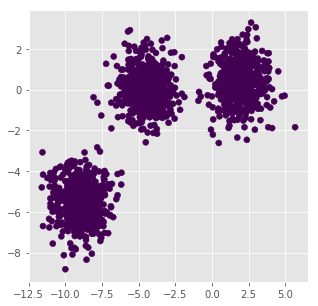

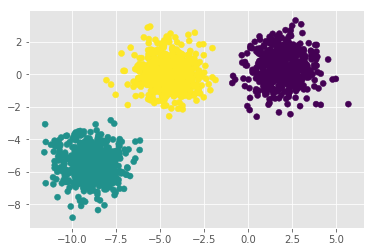

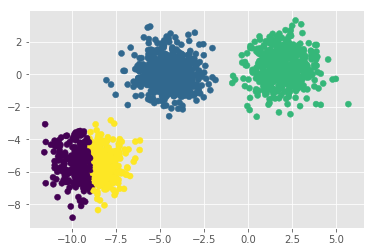

In [18]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(5, 5))

n_samples = 1500
random_state = 170

X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred1 = KMeans(n_clusters=1, random_state=random_state).fit_predict(X)
y_cent1 = KMeans(n_clusters=1, random_state=random_state).fit(X).cluster_centers_ 
plt.scatter(X[:, 0], X[:, 1], c=y_pred1)

plt.show()

# Correct number of clusters
y_pred2 = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)
y_cent2 = KMeans(n_clusters=3, random_state=random_state).fit(X).cluster_centers_ 

plt.scatter(X[:, 0], X[:, 1], c=y_pred2)

plt.show()

# Too many clusters
y_pred3 = KMeans(n_clusters=4, random_state=random_state).fit_predict(X)
y_cent3 = KMeans(n_clusters=4, random_state=random_state).fit(X).cluster_centers_ 

plt.scatter(X[:, 0], X[:, 1], c=y_pred3)

plt.show()

In [19]:
y_cent3

array([[-9.79643309, -5.52964976],
       [-4.55490993,  0.02920864],
       [ 1.91176144,  0.40634045],
       [-8.15209187, -5.43680661]])

In [26]:
h1, w1 = emd.kmeans_to_hw(y_pred1)
h2, w2 = emd.kmeans_to_hw(y_pred2)
h3, w3 = emd.kmeans_to_hw(y_pred3)

In [27]:
d1 = emd.kmeans_to_dist(y_pred1, y_cent1, y_pred3, y_cent3)
d2 = emd.kmeans_to_dist(y_pred2, y_cent2, y_pred3, y_cent3)
d3 = emd.kmeans_to_dist(y_pred1, y_cent1, y_pred2, y_cent2)

LP = emd.build_LP(h1, h3, w1, w3)
LP["c"] = d1
LP["A_eq"] = np.array([])
LP["b_eq"] = np.array([])
emd.LP_2_MPS(LP, "k1_k3.mps")
LP = emd.build_LP(h2, h3, w2, w3)
LP["c"] = d2
LP["A_eq"] = np.array([])
LP["b_eq"] = np.array([])
emd.LP_2_MPS(LP, "k2_k3.mps")
LP = emd.build_LP(h1, h2, w1, w2)
LP["c"] = d3
LP["A_eq"] = np.array([])
LP["b_eq"] = np.array([])
emd.LP_2_MPS(LP, "k1_k2.mps")

In [11]:
d1

array([1260., 1000., 1000., 1240.])

In [12]:
d2

array([ 740., 1000.,    0.,  760.,  260., 1000., 1000.,  240.,  740.,
          0., 1000.,  760.])

In [13]:
h1

array([[1., 1., 1., ..., 1., 1., 1.]])

In [14]:
h2

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])

In [28]:
LP = emd.build_LP(h1, h3, w1, w3)
LP["c"] = d1
LP["A_eq"] = np.array([])
LP["b_eq"] = np.array([])
LP

{'c': array([1260., 1000., 1000., 1240.]), 'A_ub': array([[1., 1., 1., 1.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]), 'b_ub': array([1.        , 0.16      , 0.33333333, 0.33333333, 0.17333333]), 'A_eq': array([], dtype=float64), 'b_eq': array([], dtype=float64)}